In [18]:
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import EnglishStemmer
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
import sys
import nltk
import re
import progressbar
import matplotlib.pyplot as plt

# Load Original Dataset:

In [ ]:
# data = pandas.read_csv('Chat_Text_Data.csv')
# data.drop_duplicates(inplace=True)

In [ ]:
# stemmer = EnglishStemmer()
# analyzer = CountVectorizer(preprocessor=lambda x: re.sub(r'(\d[\d\.])+', '', x.lower()),
#                             stop_words='english',lowercase=True,ngram_range=(1,1),
#                             token_pattern=u'(?u)\\b\\w\\w+\\b',analyzer='word').build_analyzer()

# def stemmed_words(doc):
#     return (stemmer.stem(w) for w in analyzer(doc))
# vectorizer = CountVectorizer(analyzer=stemmed_words,min_df=0.001)
# res = vectorizer.fit_transform(data['Text'].values)

In [ ]:
# df = pandas.DataFrame(res.toarray(),columns=vectorizer.get_feature_names(),dtype=float)
# df.drop_duplicates(inplace=True)
# df['rationale']=""
# df['label']=0
# df['label'] = df['label'].astype('int')
# df.to_csv('unlabeld_training.csv',index=False)

### code for merging old and new dataframes: (don't run)

In [ ]:
df_old = pandas.read_csv('main_train_clean.csv',index_col=False)
df_new = df

#check for matching row
def check_row(row,col_names):
    for col_name in col_names:
        try:
            meh = row[col_name]
            if meh != 1:
                return False
        except:
            pass
    return True
for i in range(df_old.shape[0]):
    print(i)
    for j in range(df_new.shape[0]):
        if check_row(df_new.iloc[j],get_nonzero_cols(df_old,i)):
            df_new.set_value(j,'rationale',df_old.iloc[i]['rationale'])
            df_new.set_value(j,'label',df_old.iloc[i]['label'])
            break

## Label initial training and test set manually: (DON'T RUN)

In [ ]:
def label(df):
    for i in range(df.shape[0]):
        if i > 301:
            break  
        if df.iloc[i]['rationale']=='' :
            print(data.iloc[i]['Text'])
            word = input()
            if word == 'exit':
                break
            label = input()
            df.set_value(i,'label',label)
            df.set_value(i,'rationale',word)
    df.to_csv('labeled_instances_300.csv',index=False)

### fix format of dataframe:

In [14]:
# df = pandas.read_csv('labeled_instances_300.csv',index_col=False,low_memory=False)
# df = pandas.DataFrame.astype(df,dtype=float,errors='ignore')
# df['label'] = df['label'].astype('int')
# df.drop_duplicates(inplace=True)
# df.fillna('',inplace=True)
# #df.to_csv('labeled_instances_300.csv',index=False)

In [ ]:
# df_train=df[0:50]
# df_test=df[50:300]

In [15]:
train_x,test_x,train_y,test_y = train_test_split(df.drop(['label'], axis =1),df['label'],random_state=42,test_size=0.33)

In [ ]:
# clf = MultinomialNB()
# clf.fit(df_train.drop(['label','rationale'], axis =1),df_train['label'])
# lwor_acc =clf.score(df_test.drop(['label','rationale'], axis =1),df_test['label'])
# print("accuracy with Lw/oR is ", lwor_acc)

In [ ]:
# stemmer = EnglishStemmer()
# apply_rationale(df_train,stemmer)
# clf = MultinomialNB(alpha=0.5)
# clf.fit(df_train.drop(['label','rationale'], axis =1),df_train['label'])
# lwr_acc = clf.score(df_test.drop(['label','rationale'], axis =1),df_test['label'])
# print("accuracy with LwR is ", lwr_acc)

In [68]:
#get column names that are nonzero from a row in a dataframe
def get_nonzero_cols(df,i):
    col_names =[]
    s = list(df.columns)
    s.pop()
    for col in s:
        if df.iloc[i][col]==1:
            col_names.append(col)
    return col_names

In [2]:
def demphsizer(df,i, rationale):
    demphsizees = []
    s = list(df.columns)
    s.pop()
    for col in s:
        if df.iloc[i][col]==1 and not col==rationale:
            demphsizees.append(col)
    return demphsizees

In [20]:
def load_labeled_data():
    df = pandas.read_csv('labeled_instances_300.csv',index_col=False)
    df = pandas.DataFrame.astype(df,dtype=float,errors='ignore')
    df['label'] = df['label'].astype('int')
    df.drop_duplicates(inplace=True)
    for col_name in df.columns:
        if df[col_name].sum()==0 and col_name!='rationale' and col_name!='label':
            df.drop(col_name,axis=1,inplace=True)
    return df

In [21]:
def apply_rationale(df_train,stemmer):
    bar = progressbar.ProgressBar(maxval=100, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
    bar.start()
    for i in range(df_train.shape[0]):
        bar.update((i*100//df_train.shape[0]))
        word = stemmer.stem(df_train.iloc[i]['rationale'])
        for col_name in demphsizer(df_train,i, word):
            df_train.set_value(i,col_name, 0.01)
    bar.finish()

In [22]:
def train_MutliNB(df_train,df_test,tracker):
    clf = MultinomialNB()
    clf.fit(df_train.drop(['label','rationale'], axis =1),df_train['label'])
    lwr_acc = clf.score(df_test.drop(['label','rationale'], axis =1),df_test['label'].astype('int'))
    tracker.append(lwr_acc)
    print("current accuracy with LwR is ", lwr_acc)
    return clf

In [23]:
def calculate_rationale(df, i,stemmer):
    rationale = stemmer.stem(df.iloc[i]['rationale'])
    for col_name in demphsizer(df,i, rationale):
        df.set_value(i,col_name, 0.01)

In [24]:
def find_most_uncertain_instance(clf,df_test):
    predicted_prob = clf.predict_proba(df_test.drop(['label','rationale'], axis =1))
    clearPRE = np.abs(np.add(predicted_prob[:,1],-0.5))
    index = np.argmin(clearPRE)
    return index

In [25]:
def find_most_UNPC_instances(clf,df_test,df_train):
    predicted_prob = clf.predict_proba(df_test.drop(['label','rationale'], axis =1))
    clearPRE = np.abs(np.add(predicted_prob[:,1],-0.5))
    indices = np.argsort(clearPRE)[:20]
    results = choose_UNPC_instances(indices,df_train,df_test)
    return results

In [26]:
def rationale_dictionary(df_train):
    rationales = dict()
    stemmer = EnglishStemmer()
    for i in range(df_train.shape[0]):
        rationales[stemmer.stem(df_train.iloc[i]['rationale'])]=df_train.iloc[i]['label']
    return rationales

In [27]:
def choose_UNPC_instances(indices,df_train,df_test):
    score_int = []
    rationale_dict = rationale_dictionary(df_train)
    for i in indices:
        words = get_nonzero_cols(df_test,i)
        pos_rationale = False
        neg_rationale = False
        for word in words:
            try:
                score = rationale_dict[word]
                if score ==1:
                    pos_rationale=True
                else:
                    neg_rationale=True 
            except:
                pass
        if pos_rationale and neg_rationale:
            score_int.append((i,1))
        else:
            score_int.append((i,0))
    score_int.sort(key=lambda x: x[1],reverse=True)
    score_int= score_int[:5]
    chosen = [x[0] for x in score_int]
    return chosen

In [35]:
def interactive_learning_UNPC(demo = False,budget=10):
    data = pandas.read_csv('Chat_Text_Data.csv')
    data.drop_duplicates(inplace=True)
    print("loading original data...")
    df = load_labeled_data()
    print("loading labeled data...")
    train_x,test_x,train_y,test_y = train_test_split(df.drop(['label'], axis =1),df['label'],random_state=42,test_size=(0.97))
    df_train=train_x.copy()
    df_train['label']=train_y
    df_test=test_x.copy()
    df_test['label']=test_y
    print("applying rationale on training data...")
    stemmer = EnglishStemmer()
    #apply_rationale(df_train,stemmer)
    print("training a MultinomialNB classifier...")
    tracker=[]
    clf = train_MutliNB(df_train,df_test,tracker)
    while budget >0 :    
        #i = find_most_uncertain_instance(clf,df_test)
        indices = find_most_UNPC_instances(clf,df_test,df_train)
        for i in indices:
            if demo:
                print("interactive learning started")
                print("if you want to quit at any time, enter label as \'exit0\'")
                print("current budget is ", budget)
                obj = data.iloc[i+df_train.shape[0]]['Text']
                print(obj)
                rationale = input(prompt="Rationale:")
                if rationale == 'exit0':
                    print("goodbye, I am going to die.")
                    break
                label = input(prompt="Label is 0 for - and 1 for +:")
                df_test.set_value(i,'label',label)
                df_test.set_value(i,'rationale',rationale)
            calculate_rationale(df_test, i,stemmer)
            row = df_test.iloc[i]
            df_train = df_train.append(row,ignore_index=True)
            df_test.drop(i,axis=0,inplace=True)
            budget-=1
        clf = train_MutliNB(df_train,df_test,tracker)
    print("We have exausted the budget")
    return tracker

In [36]:
def traditional_learning(budget=10):
    data = pandas.read_csv('Chat_Text_Data.csv')
    data.drop_duplicates(inplace=True)
    print("loading original data...")
    df = load_labeled_data()
    print("loading labeled data...")
    train_x,test_x,train_y,test_y = train_test_split(df.drop(['label'], axis =1),df['label'],random_state=42,test_size=(0.97))
    df_train=train_x.copy()
    df_train['label']=train_y
    df_test=test_x.copy()
    df_test['label']=test_y
    print("applying rationale on training data...")
    stemmer = EnglishStemmer()
    #apply_rationale(df_train,stemmer)
    print("training a MultinomialNB classifier...")
    tracker=[]
    clf = train_MutliNB(df_train,df_test,tracker)
    idxs=[x for x in range(5)]
    while budget >0:
        for i in idxs:
            row = df_test.iloc[i]
            df_train = df_train.append(row,ignore_index=True)
            df_test=df_test.iloc[1:]
            budget-=1
        clf = train_MutliNB(df_train,df_test,tracker)
    print("We have exausted the budget")
    return tracker

In [37]:
def interactive_learning(demo = False,budget=10):
    data = pandas.read_csv('Chat_Text_Data.csv')
    data.drop_duplicates(inplace=True)
    print("loading original data...")
    df = load_labeled_data()
    print("loading labeled data...")
    train_x,test_x,train_y,test_y = train_test_split(df.drop(['label'], axis =1),df['label'],random_state=42,test_size=(0.97))
    df_train=train_x.copy()
    df_train['label']=train_y
    df_test=test_x.copy()
    df_test['label']=test_y
    print("applying rationale on training data...")
    stemmer = EnglishStemmer()
    print("training a MultinomialNB classifier...")
    tracker=[]
    clf = train_MutliNB(df_train,df_test,tracker)
    while budget >0 :
        for x in range(5):
            i = find_most_uncertain_instance(clf,df_test)
            calculate_rationale(df_test, i,stemmer)
            row = df_test.iloc[i]
            df_train = df_train.append(row,ignore_index=True)
            df_test.drop(i,axis=0,inplace=True)
            budget-=1
        clf = train_MutliNB(df_train,df_test,tracker)
    print("We have exausted the budget")
    return tracker

In [42]:
def interactive_learning_NB(demo = False,budget=10):
    data = pandas.read_csv('Chat_Text_Data.csv')
    data.drop_duplicates(inplace=True)
    print("loading original data...")
    df = load_labeled_data()
    print("loading labeled data...")
    train_x,test_x,train_y,test_y = train_test_split(df.drop(['label'], axis =1),df['label'],random_state=42,test_size=(0.97))
    df_train=train_x.copy()
    df_train['label']=train_y
    df_test=test_x.copy()
    df_test['label']=test_y
    print("applying rationale on training data...")
    stemmer = EnglishStemmer()
    print("training a MultinomialNB classifier...")
    tracker=[]
    clf = train_MutliNB(df_train,df_test,tracker)
    while budget >0 :
        i = find_most_uncertain_instance(clf,df_test)
        calculate_rationale(df_test, i,stemmer)
        row = df_test.iloc[i]
        df_train = df_train.append(row,ignore_index=True)
        df_test.drop(i,axis=0,inplace=True)
        budget-=1
        clf = train_MutliNB(df_train,df_test,tracker)
    print("We have exausted the budget")
    return tracker

In [43]:
arNB_25= interactive_learning_NB(budget=50)

loading original data...
loading labeled data...
applying rationale on training data...
training a MultinomialNB classifier...
current accuracy with LwR is  0.714776632302
current accuracy with LwR is  0.710344827586
current accuracy with LwR is  0.643598615917
current accuracy with LwR is  0.690972222222
current accuracy with LwR is  0.700348432056
current accuracy with LwR is  0.727272727273
current accuracy with LwR is  0.733333333333
current accuracy with LwR is  0.725352112676
current accuracy with LwR is  0.69014084507
current accuracy with LwR is  0.689045936396
current accuracy with LwR is  0.698581560284
current accuracy with LwR is  0.722419928826
current accuracy with LwR is  0.742857142857
current accuracy with LwR is  0.731182795699
current accuracy with LwR is  0.712230215827
current accuracy with LwR is  0.725631768953
current accuracy with LwR is  0.731884057971
current accuracy with LwR is  0.738181818182
current accuracy with LwR is  0.737226277372
current accuracy wi

In [38]:
il_UNPC_25 = interactive_learning_UNPC(budget=50)

loading original data...
loading labeled data...
applying rationale on training data...
training a MultinomialNB classifier...
current accuracy with LwR is  0.714776632302
current accuracy with LwR is  0.727272727273
current accuracy with LwR is  0.786476868327
current accuracy with LwR is  0.757246376812
current accuracy with LwR is  0.774907749077
current accuracy with LwR is  0.80223880597
current accuracy with LwR is  0.809885931559
current accuracy with LwR is  0.817829457364
current accuracy with LwR is  0.811023622047
current accuracy with LwR is  0.827309236948
current accuracy with LwR is  0.828571428571
We have exausted the budget


In [39]:
trad_25 = traditional_learning(50)

loading original data...
loading labeled data...
applying rationale on training data...
training a MultinomialNB classifier...
current accuracy with LwR is  0.714776632302
current accuracy with LwR is  0.734265734266
current accuracy with LwR is  0.683274021352
current accuracy with LwR is  0.717391304348
current accuracy with LwR is  0.708487084871
current accuracy with LwR is  0.699248120301
current accuracy with LwR is  0.724137931034
current accuracy with LwR is  0.71484375
current accuracy with LwR is  0.729083665339
current accuracy with LwR is  0.764227642276
current accuracy with LwR is  0.746887966805
We have exausted the budget


In [40]:
al_25= interactive_learning(budget=50)

loading original data...
loading labeled data...
applying rationale on training data...
training a MultinomialNB classifier...
current accuracy with LwR is  0.714776632302
current accuracy with LwR is  0.644827586207
current accuracy with LwR is  0.75
current accuracy with LwR is  0.668989547038
current accuracy with LwR is  0.657342657343
current accuracy with LwR is  0.647887323944
current accuracy with LwR is  0.664310954064
current accuracy with LwR is  0.691489361702
current accuracy with LwR is  0.729241877256
current accuracy with LwR is  0.731884057971
current accuracy with LwR is  0.763636363636
We have exausted the budget


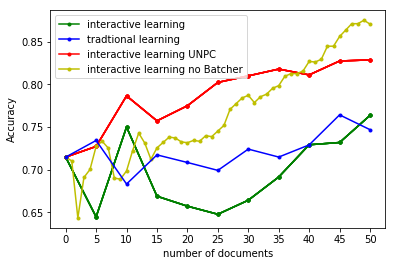

In [48]:
x2= [i*5 for i in range(11)]
x= [i for i in range(51)]
irn, = plt.plot(x2,il_UNPC_25,'.r-',label='interactive learning UNPC')
ir, = plt.plot(x2,al_25,'.g-',label='interactive learning')
irNB, = plt.plot(x,arNB_25,'.y-',label='interactive learning no Batcher')
tr, = plt.plot(x2,trad_25,'.b-',label='tradtional learning')
plt.ylabel('Accuracy')
plt.xlabel('number of documents')
plt.xscale('linear')
plt.xticks(x2)
plt.legend(handles=[ir,tr,irn,irNB])
plt.show()